# PN2V Training
Here we will use the estimated noise model (from the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```) and train a PN2V network on single noisy images.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

from ppn2v.unet.model import UNet
from ppn2v import utils, training
from ppn2v.noise_models import gaussianMixtureNoiseModel, histNoiseModel

from tifffile import imread
import os
import urllib
import zipfile
import torch
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

Load the data that needs to be denoised. It is expected that you have downloaded the datasets from  https://cloud.mpi-cbg.de/index.php/s/BE8raMtHQlgLDF3/download and created a noise model (GMM- and  histogram- based) using the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```). Ensure that for Convallaria, the data to be denoised is named ```20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif``` and not the diaphragm data. 

In [2]:
path='../../../data/Convallaria_diaphragm/'
# Load the training data
data=imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')
dataName='convallaria'

Uncomment the pertinent `nameNoiseModel` to choose the noiseModel of interest

In [3]:
nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'calibration'
#nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'calibration'
# nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'bootstrap'
#nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'bootstrap'


In [4]:
namePN2VModel=nameNoiseModel
if('HistNoiseModel' in namePN2VModel):
    histogram = np.load(path+nameNoiseModel+'.npy') 
    noiseModel= histNoiseModel.NoiseModel(histogram, device=device)
elif('GMMNoiseModel' in namePN2VModel):
    params= np.load(path+nameNoiseModel+'.npz')
    noiseModel = gaussianMixtureNoiseModel.GaussianMixtureNoiseModel(params = params, device = device)
    

### Create the Network and Train it
This can take a while.

In [5]:
# Create a network with 800 output channels that are interpreted as samples from the prior.
net = UNet(800, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()
np.random.shuffle(my_train_data)
np.random.shuffle(my_val_data)

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix=namePN2VModel, directory=path, noiseModel=noiseModel,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 3.818160021305084+-(2SEM)0.14633168326209803      
Epoch 1 finished      
avg. loss: 3.323695456981659+-(2SEM)0.08211430777387463      
Epoch 2 finished      
avg. loss: 3.3082102656364443+-(2SEM)0.12670445121201115      
Epoch 3 finished      
avg. loss: 3.2323479056358337+-(2SEM)0.1574267172972899      
Epoch 4 finished      
avg. loss: 3.0451154112815857+-(2SEM)0.11244975784585291      
Epoch 5 finished      
avg. loss: 3.065613567829132+-(2SEM)0.12047166594557712      
Epoch 6 finished      
avg. loss: 3.050150978565216+-(2SEM)0.11336167256383614      
Epoch 7 finished      
avg. loss: 2.89127197265625+-(2SEM)0.11643716970913405      
Epoch 8 finished      
avg. loss: 3.0034083843231203+-(2SEM)0.116121910212503      
Epoch 9 finished      
avg. loss: 2.972826051712036+-(2SEM)0.11428396871030491      
Epoch 10 finished      
avg. loss: 2.932040572166443+-(2SEM)0.1330471724847371      
Epoch 11 finished      
avg. loss: 2.8873971819877626+-(2SEM)0.07

avg. loss: 2.8112492084503176+-(2SEM)0.09761141550231045      
Epoch 93 finished      
avg. loss: 2.8441107511520385+-(2SEM)0.1103000174612015      
Epoch 94 finished      
avg. loss: 2.7880218029022217+-(2SEM)0.09832108453980114      
Epoch 95 finished      
avg. loss: 2.8732114911079405+-(2SEM)0.10856100254898676      
Epoch 96 finished      
avg. loss: 2.809083902835846+-(2SEM)0.10183992980124157      
Epoch 97 finished      
avg. loss: 2.864212489128113+-(2SEM)0.09797229267118002      
Epoch 98 finished      
avg. loss: 2.8436938881874085+-(2SEM)0.09286583992447979      
Epoch 99 finished      
avg. loss: 2.854823076725006+-(2SEM)0.09958426666915512      
Epoch 100 finished      
avg. loss: 2.7842705965042116+-(2SEM)0.09803183850580215      
Epoch 101 finished      
avg. loss: 2.84213844537735+-(2SEM)0.10815592251643792      
Epoch 102 finished      
avg. loss: 2.7792528748512266+-(2SEM)0.08145158612676352      
Epoch   103: reducing learning rate of group 0 to 3.1250e-05.
Epoch 10

Epoch 182 finished      
avg. loss: 2.8098848700523376+-(2SEM)0.10778614753317879      
Epoch   183: reducing learning rate of group 0 to 4.8828e-07.
Epoch 183 finished      
avg. loss: 2.823003721237183+-(2SEM)0.12069164204077582      
Epoch 184 finished      
avg. loss: 2.8159873366355894+-(2SEM)0.11780302157639723      
Epoch 185 finished      
avg. loss: 2.744589376449585+-(2SEM)0.10110550795517252      
Epoch 186 finished      
avg. loss: 2.909355580806732+-(2SEM)0.10521163812876184      
Epoch 187 finished      
avg. loss: 2.8159554243087768+-(2SEM)0.09436823730979511      
Epoch 188 finished      
avg. loss: 2.7673267126083374+-(2SEM)0.10331368823240539      
Epoch 189 finished      
avg. loss: 2.83122798204422+-(2SEM)0.06781638512357635      
Epoch 190 finished      
avg. loss: 2.827648627758026+-(2SEM)0.11555340033995412      
Epoch 191 finished      
avg. loss: 2.8286678433418273+-(2SEM)0.1104761277421053      
Epoch 192 finished      
avg. loss: 2.771745038032532+-(2SEM)0.10

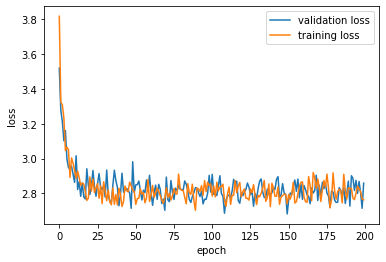

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()